# EX 1 Object Localization

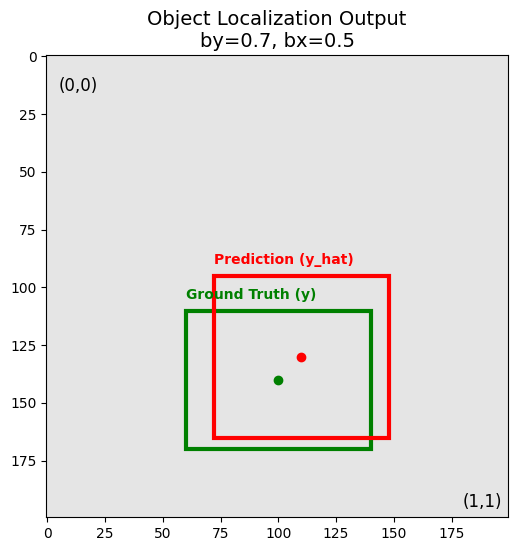

In [1]:
### Full Visualization Implementation
'''
This visualization draws a **Bounding Box** on an image based on the coordinate convention b_x, b_y, b_h, b_w)
defined in the transcript. It visually compares a "Ground Truth" box against a "Predicted" box.
'''
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def visualize_bounding_box():
    # Create a blank image (e.g., 200x200)
    img_size = 200
    img = np.ones((img_size, img_size, 3)) * 0.9 # Light gray background
    
    # --- Define Box Coordinates (Normalized 0 to 1) ---
    # Example from transcript: Center(0.5, 0.7), Height=0.3, Width=0.4
    true_box = [0.5, 0.7, 0.3, 0.4]  # [bx, by, bh, bw]
    pred_box = [0.55, 0.65, 0.35, 0.38] # Slightly off prediction
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img)
    
    # Helper to convert Normalized (0-1) to Pixel Coordinates
    def draw_rect(box, color, label):
        bx, by, bh, bw = box
        
        # Calculate Top-Left Corner (x, y) for Matplotlib
        # bx is center_x, by is center_y
        # x_min = center_x - width/2
        # y_min = center_y - height/2
        w_pixel = bw * img_size
        h_pixel = bh * img_size
        x_pixel = (bx * img_size) - (w_pixel / 2)
        y_pixel = (by * img_size) - (h_pixel / 2)
        
        # Draw Rectangle
        rect = patches.Rectangle((x_pixel, y_pixel), w_pixel, h_pixel, 
                                 linewidth=3, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
        
        # Draw Center Point
        ax.plot(bx * img_size, by * img_size, marker='o', color=color)
        ax.text(x_pixel, y_pixel - 5, label, color=color, fontweight='bold')

    # Draw Boxes
    draw_rect(true_box, 'green', 'Ground Truth (y)')
    draw_rect(pred_box, 'red', 'Prediction (y_hat)')
    
    # Annotation for Coordinate System
    ax.text(5, 15, "(0,0)", color='black', fontsize=12)
    ax.text(180, 195, "(1,1)", color='black', fontsize=12)
    
    ax.set_title(f"Object Localization Output\nby={true_box[1]}, bx={true_box[0]}", fontsize=14)
    plt.axis('on')
    plt.show()

visualize_bounding_box()

# EX 2 LandMarks Detection

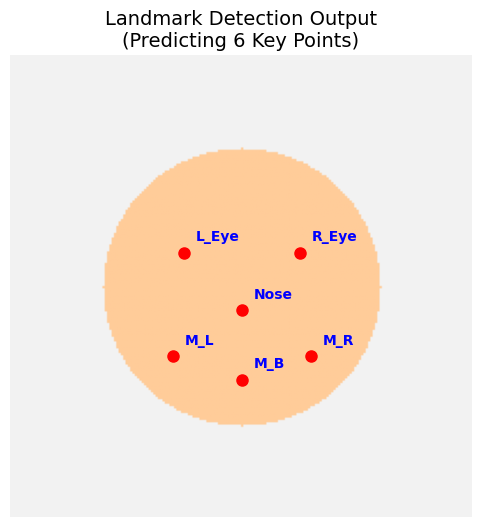

In [3]:
### Full Visualization Implementation
'''
This visualization simulates **Landmark Detection** on a face. 
It draws localized points (simulating eye corners and mouth) on an image to show what the network output looks like.
'''
import matplotlib.pyplot as plt
import numpy as np

def visualize_landmarks():
    # Create a blank image
    img_size = 200
    img = np.ones((img_size, img_size, 3)) * 0.95 # Off-white background
    
    # Draw a "Face" (Circle)
    center = (100, 100)
    radius = 60
    y, x = np.ogrid[:img_size, :img_size]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2
    img[mask] = [1.0, 0.8, 0.6] # Skin tone approximation
    
    # --- Define Landmarks (Ground Truth / Prediction) ---
    # Format: [(x, y), label]
    landmarks = [
        ((75, 85), "L_Eye"),   # Left Eye
        ((125, 85), "R_Eye"),  # Right Eye
        ((100, 110), "Nose"),  # Nose
        ((70, 130), "M_L"),    # Mouth Left
        ((130, 130), "M_R"),   # Mouth Right
        ((100, 140), "M_B")    # Mouth Bottom
    ]
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img)
    
    # Plot Landmarks
    for (lx, ly), label in landmarks:
        # Plot point
        ax.plot(lx, ly, marker='o', color='red', markersize=8)
        # Plot label
        ax.text(lx + 5, ly - 5, label, color='blue', fontsize=10, fontweight='bold')

    ax.set_title("Landmark Detection Output\n(Predicting 6 Key Points)", fontsize=14)
    ax.axis('off')
    plt.show()

visualize_landmarks()

# Ex3 Sliding Windows

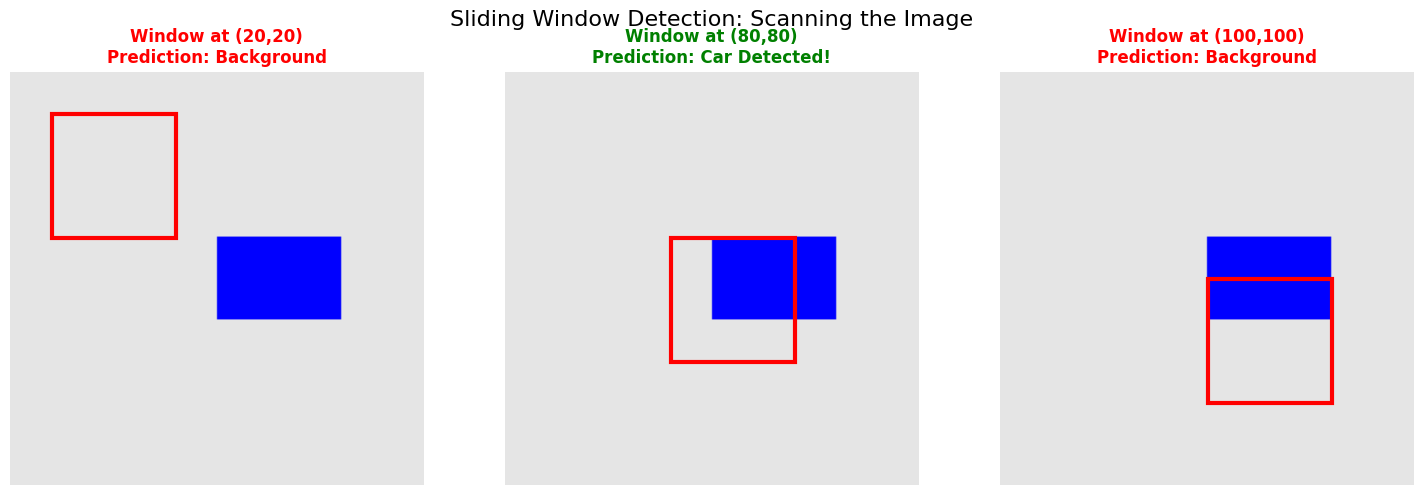

In [1]:
### Full Visualization Implementation

'''
This visualization simulates the **Sliding Window Process**. 
It draws a red box moving across an image to demonstrate how the algorithm scans every location.
'''
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def visualize_sliding_window():
    # Create a background image
    img_size = 200
    img = np.ones((img_size, img_size, 3)) * 0.9
    
    # Draw a "Car"
    img[80:120, 100:160, :] = [0, 0, 1] # Blue box = Car
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Define 3 steps in the sliding process
    positions = [(20, 20), (80, 80), (100, 100)] # (x, y)
    window_size = 60
    
    for ax, (x, y) in zip(axes, positions):
        ax.imshow(img)
        
        # Draw the Sliding Window
        rect = patches.Rectangle((x, y), window_size, window_size, 
                                 linewidth=3, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        
        # Check if overlaps with car (simple logic)
        overlap = (x > 60 and x < 120 and y > 60 and y < 100)
        label = "Car Detected!" if overlap else "Background"
        color = 'green' if overlap else 'red'
        
        ax.set_title(f"Window at ({x},{y})\nPrediction: {label}", color=color, fontweight='bold')
        ax.axis('off')

    plt.suptitle("Sliding Window Detection: Scanning the Image", fontsize=16)
    plt.tight_layout()
    plt.show()

visualize_sliding_window()

# CONV Sliding Windows 

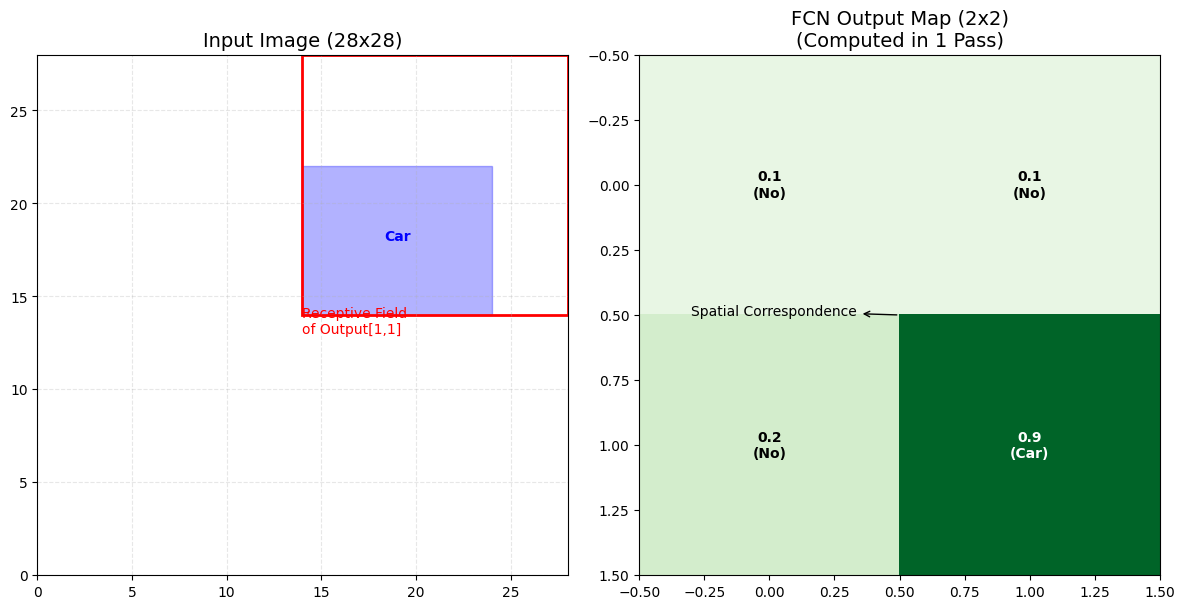

In [3]:
### Full Visualization Implementation
'''
This visualization demonstrates the **"Efficiency Gain"**. It shows how a single pass over a large image produces a grid of outputs, where each cell represents a sliding window prediction.
'''
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def visualize_fcn_sliding_window():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # --- 1. Large Input Image ---
    img_size = 28
    ax1.set_xlim(0, img_size); ax1.set_ylim(0, img_size)
    ax1.set_title(f"Input Image ({img_size}x{img_size})", fontsize=14)
    ax1.grid(True, linestyle='--', alpha=0.3)
    
    # Draw a "Car" at a specific location
    car_rect = patches.Rectangle((14, 14), 10, 8, color='blue', alpha=0.3)
    ax1.add_patch(car_rect)
    ax1.text(19, 18, "Car", ha='center', color='blue', fontweight='bold')

    # Visualize one "Sliding Window" (The receptive field of one output pixel)
    # Let's say the receptive field corresponds to a 14x14 area
    window_rect = patches.Rectangle((14, 14), 14, 14, linewidth=2, edgecolor='red', facecolor='none')
    ax1.add_patch(window_rect)
    ax1.text(14, 13, "Receptive Field\nof Output[1,1]", color='red', fontsize=10)

    # --- 2. Convolutional Output Map ---
    # Output size depends on stride/pooling. Let's assume output is 2x2 for simplicity
    out_size = 2
    output_map = np.zeros((out_size, out_size))
    
    # The car is in the bottom-right quadrant, so output[1,1] should be high
    output_map[0, 0] = 0.1 # Top-Left
    output_map[0, 1] = 0.1 # Top-Right
    output_map[1, 0] = 0.2 # Bottom-Left
    output_map[1, 1] = 0.9 # Bottom-Right (Car Detected!)

    ax2.imshow(output_map, cmap='Greens', vmin=0, vmax=1)
    ax2.set_title(f"FCN Output Map ({out_size}x{out_size})\n(Computed in 1 Pass)", fontsize=14)
    
    # Label the cells
    for i in range(out_size):
        for j in range(out_size):
            val = output_map[i, j]
            label = "Car" if val > 0.5 else "No"
            color = "white" if val > 0.5 else "black"
            ax2.text(j, i, f"{val}\n({label})", ha='center', va='center', color=color, fontweight='bold')

    # Draw arrow connecting logic
    plt.annotate("Spatial Correspondence", xy=(0.5, 0.5), xytext=(0.1, 0.5), 
                 xycoords='axes fraction', textcoords='axes fraction',
                 arrowprops=dict(arrowstyle="<-", color='black'))

    plt.tight_layout()
    plt.show()

visualize_fcn_sliding_window()

# Bounding BOxes

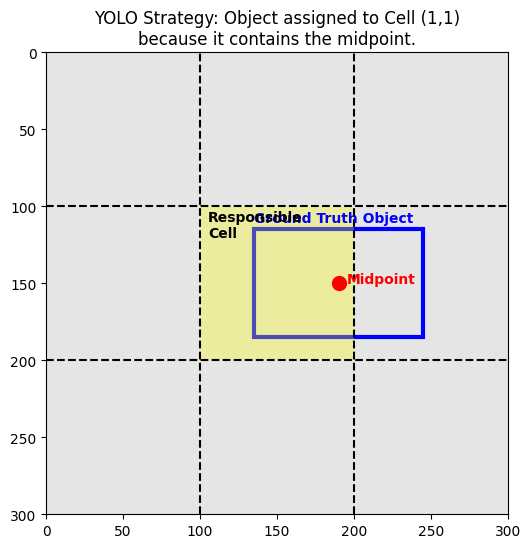

In [4]:
### Full Visualization Implementation
'''
This visualization illustrates the **YOLO Grid Assignment**.
1.  It divides an image into a $3 \times 3$ grid.
2.  It identifies the **Midpoint** of an object (Car).
3.  It highlights the **Specific Grid Cell** responsible for detecting that object.
4.  It draws the bounding box to show how it can be larger than the cell itself.
'''
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def visualize_yolo_grid():
    # Setup Image
    img_size = 300
    grid_size = 3 # 3x3
    cell_size = img_size / grid_size
    img = np.ones((img_size, img_size, 3)) * 0.9
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img)
    
    # --- Define Object (Car) ---
    # Car is in the middle-right area
    # Box: x=180, y=140, w=100, h=60 (Absolute pixels)
    car_x, car_y, car_w, car_h = 190, 150, 110, 70
    
    # Draw Car Bounding Box
    rect = patches.Rectangle((car_x - car_w/2, car_y - car_h/2), car_w, car_h, 
                             linewidth=3, edgecolor='blue', facecolor='none')
    ax.add_patch(rect)
    ax.text(car_x - car_w/2, car_y - car_h/2 - 5, "Ground Truth Object", color='blue', weight='bold')
    
    # --- Determine Grid Cell ---
    # Which cell contains the center (190, 150)?
    # cell_x = floor(190 / 100) = 1
    # cell_y = floor(150 / 100) = 1
    midpoint = (car_x, car_y)
    cell_idx_x = int(car_x // cell_size)
    cell_idx_y = int(car_y // cell_size)
    
    # Draw Grid
    for i in range(1, grid_size):
        ax.axvline(i * cell_size, color='black', linestyle='--')
        ax.axhline(i * cell_size, color='black', linestyle='--')
        
    # --- Highlight Responsible Cell ---
    # Cell (1, 1) -> The center cell
    cell_rect = patches.Rectangle((cell_idx_x * cell_size, cell_idx_y * cell_size), cell_size, cell_size, 
                                  linewidth=0, facecolor='yellow', alpha=0.3)
    ax.add_patch(cell_rect)
    
    # Plot Midpoint
    ax.plot(midpoint[0], midpoint[1], marker='o', color='red', markersize=10)
    ax.text(midpoint[0]+5, midpoint[1], "Midpoint", color='red', weight='bold')
    
    # Annotate Assignment
    ax.text(cell_idx_x * cell_size + 5, cell_idx_y * cell_size + 20, 
            "Responsible\nCell", fontsize=10, fontweight='bold', color='black')

    # Add Logic Text
    plt.title(f"YOLO Strategy: Object assigned to Cell ({cell_idx_x},{cell_idx_y})\nbecause it contains the midpoint.", fontsize=12)
    
    ax.set_xlim(0, img_size); ax.set_ylim(img_size, 0) # Image coords
    plt.show()

visualize_yolo_grid()